In [112]:
import networkx as nx
import pandas as pd
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
import sys
sys.path.append(str(Path.cwd() / "Week 2 - Networks"))
from airline_network_analysis import (
    plot_degree_distribution,
    calculate_centrality_measures,
)

In [ ]:
#store nodes and edges data
nodes = pd.read_csv("fb-pages-public-figure.nodes")
edges = pd.read_csv(
    "fb-pages-public-figure.edges",
    header=None,
    names=["source_new_id", "target_new_id"],
)
# merge to get page names
df_merged = (
    edges
    .merge(nodes[['new_id', 'name']], left_on='source_new_id', right_on='new_id')
    .rename(columns={'name': 'page_name_1'})
    .drop('new_id', axis=1)
    .merge(nodes[['new_id', 'name']], left_on='target_new_id', right_on='new_id')
    .rename(columns={'name': 'page_name_2'})
    .drop('new_id', axis=1)
    .rename(columns={
        'source_new_id': 'page_id_1',
        'target_new_id': 'page_id_2'
    })
)

In [62]:
def create_facebookpage_network(df):
    """
    Create a network graph from Facebook page data.
    
    Args:
        df (pandas.DataFrame): Facebook page data
        
    Returns:
        networkx.Graph: Undirected graph of Facebook page connections
    """
    print("Creating Facebook page network...")
    
    # Create undirected graph (dataset shows pages in bidirectional connections)
    G = nx.Graph()
    
    # Add edges for each route
    for _, row in df.iterrows():
        source = row['page_name_1']
        dest = row['page_name_2']

        # Skip self-loops
        if source != dest:
            if G.has_edge(source, dest):
                # Increment weight if edge already exists
                G[source][dest]['weight'] += 1
            else:
                # Add new edge with weight 1
                G.add_edge(source, dest, weight=1)

    print(f"Network created with {G.number_of_nodes()} facebook pages and {G.number_of_edges()} connections")

    return G

In [85]:
def network_summary(G, df):
    """
    Print a summary of the network properties.
    
    Args:
        G (networkx.Graph): Network graph
        df (pandas.DataFrame): Original data
    """
    print(f"\n{'='*60}")
    print("NETWORK SUMMARY")
    print(f"{'='*60}")
    
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of connections (edges): {G.number_of_edges()}")
    print(f"Number of routes in dataset: {len(df)}")
    
    # Connected components
    num_components = nx.number_connected_components(G)
    largest_cc_size = len(max(nx.connected_components(G), key=len))
    
    print(f"Number of connected components: {num_components}")
    print(f"Size of largest connected component: {largest_cc_size}")
    print(f"Percentage in largest component: {largest_cc_size/G.number_of_nodes()*100:.1f}%")
    
    # Density
    density = nx.density(G)
    print(f"Network density: {density:.6f}")
    
    # Average clustering coefficient
    avg_clustering = nx.average_clustering(G)
    print(f"Average clustering coefficient: {avg_clustering:.4f}")


In [69]:
def display_top_facebook_pages(centralities, top_n=10):
    """
    Display top N Facebook pages for each centrality measure.

    Args:
        centralities (dict): Dictionary of centrality measures
        top_n (int): Number of top Facebook pages to display
    """
    print(f"\n{'='*60}")
    print(f"TOP {top_n} FACEBOOK PAGES BY CENTRALITY MEASURES")
    print(f"{'='*60}")
    
    for measure_name, measure_values in centralities.items():
        print(f"\n{measure_name.upper()} CENTRALITY:")
        print("-" * 40)
        
        # Sort airports by centrality value
        sorted_airports = sorted(measure_values.items(), key=lambda x: x[1], reverse=True)
        
        for i, (airport, value) in enumerate(sorted_airports[:top_n], 1):
            print(f"{i:2d}. {airport:4s} - {value:.6f}")

In [ ]:
# Create the Facebook page network
G = create_facebookpage_network(df_merged)


Creating Facebook page network...
Network created with 11534 facebook pages and 66942 connections


In [102]:
# Analyze and print basic network properties
print("Facebook Page Network Summary:")
network_summary(G, df_merged)

Facebook Page Network Summary:

NETWORK SUMMARY
Number of nodes: 11534
Number of connections (edges): 66942
Number of routes in dataset: 67099
Number of connected components: 1
Size of largest connected component: 11534
Percentage in largest component: 100.0%
Network density: 0.001006
Average clustering coefficient: 0.1785


Plotting degree distribution...


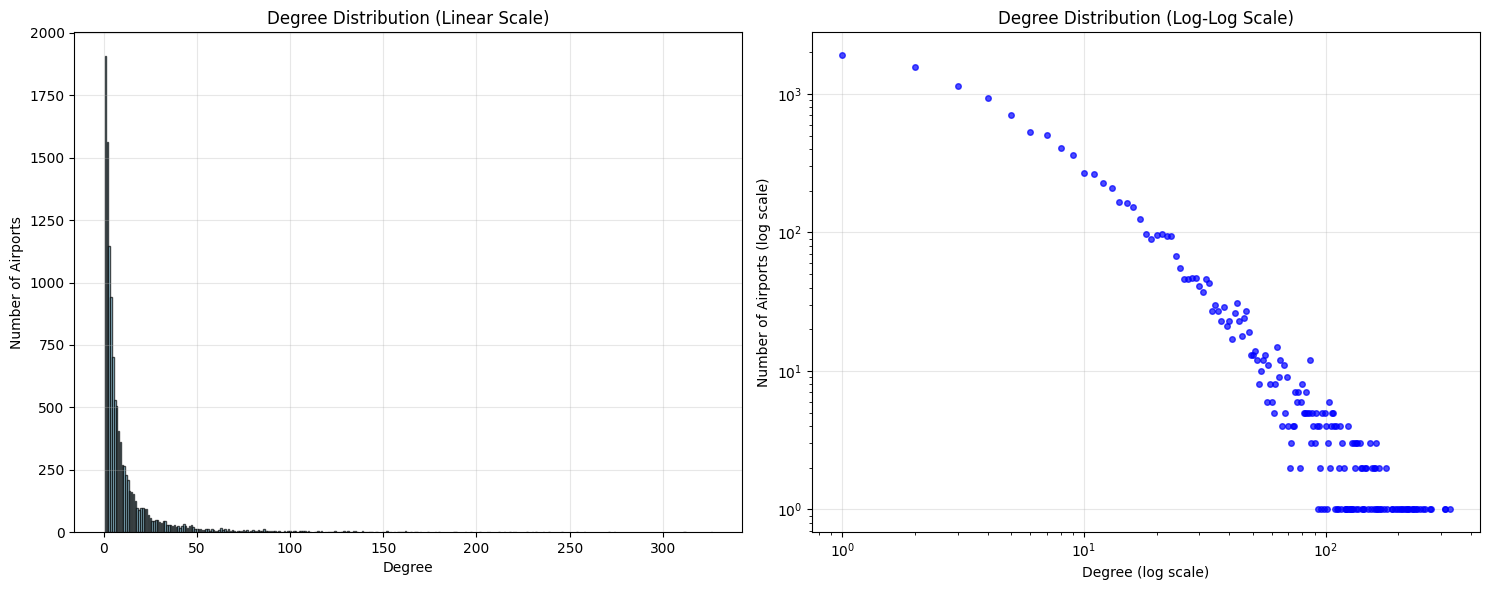


Degree Distribution Statistics:
Mean degree: 11.61
Median degree: 5.00
Max degree: 326
Min degree: 1
Standard deviation: 21.31


In [ ]:
#plot degree distributions for facebook network
plot_degree_distribution(G)

In [ ]:
#store centrality measures of top facebook pages for further analysis
centralities = calculate_centrality_measures(G)

Calculating centrality measures...
  - Degree centrality...
  - Betweenness centrality...
    (using sampling with k=1000 nodes)
  - Closeness centrality...
  - Eigenvector centrality...


In [ ]:
#show top facebook pages by centrality measures
display_top_facebook_pages(centralities, top_n=10)


TOP 10 FACEBOOK PAGES BY CENTRALITY MEASURES

DEGREE CENTRALITY:
----------------------------------------
 1. Oprah Winfrey - 0.028267
 2. 徐若瑄 Vivian Hsu - 0.027053
 3. Dwayne The Rock Johnson - 0.026966
 4. 煎熬弟 鍾明軒 - 0.023758
 5. Hugh Jackman - 0.023498
 6. Sascha Grammel - 0.022371
 7. Daniel Amos - 0.022024
 8. 黃沐妍-小豬 - 0.021330
 9. 王彩樺-台灣濱崎步 - 0.020723
10. 羅平 Atif Baig - 0.020463

BETWEENNESS CENTRALITY:
----------------------------------------
 1. Daniel Amos - 0.063883
 2. Hugh Jackman - 0.061277
 3. Dwayne The Rock Johnson - 0.059331
 4. Oprah Winfrey - 0.056097
 5. Sergio Carlo - 0.039096
 6. Michelle Obama - 0.033669
 7. Kim Kardashian West - 0.030764
 8. Leon Alonso - 0.024994
 9. Eric West - 0.022396
10. Dalai Lama - 0.021109

CLOSENESS CENTRALITY:
----------------------------------------
 1. Daniel Amos - 0.341375
 2. Dwayne The Rock Johnson - 0.340679
 3. Hugh Jackman - 0.338877
 4. Oprah Winfrey - 0.333961
 5. Sergio Carlo - 0.332143
 6. Eric West - 0.326834
 7. Kim Kard

C:\Users\binti\AppData\Local\Temp\ipykernel_10500\46983170.py:25: UserWarning: Glyph 24464 (\N{CJK UNIFIED IDEOGRAPH-5F90}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\binti\AppData\Local\Temp\ipykernel_10500\46983170.py:25: UserWarning: Glyph 33509 (\N{CJK UNIFIED IDEOGRAPH-82E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\binti\AppData\Local\Temp\ipykernel_10500\46983170.py:25: UserWarning: Glyph 29764 (\N{CJK UNIFIED IDEOGRAPH-7444}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\binti\AppData\Local\Temp\ipykernel_10500\46983170.py:25: UserWarning: Glyph 29006 (\N{CJK UNIFIED IDEOGRAPH-714E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\binti\AppData\Local\Temp\ipykernel_10500\46983170.py:25: UserWarning: Glyph 29100 (\N{CJK UNIFIED IDEOGRAPH-71AC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\binti\AppData\Local\Temp\ipykernel_10500\46983170.py:25: UserWarning: Glyph 24351 (\N{CJK UNIFIE

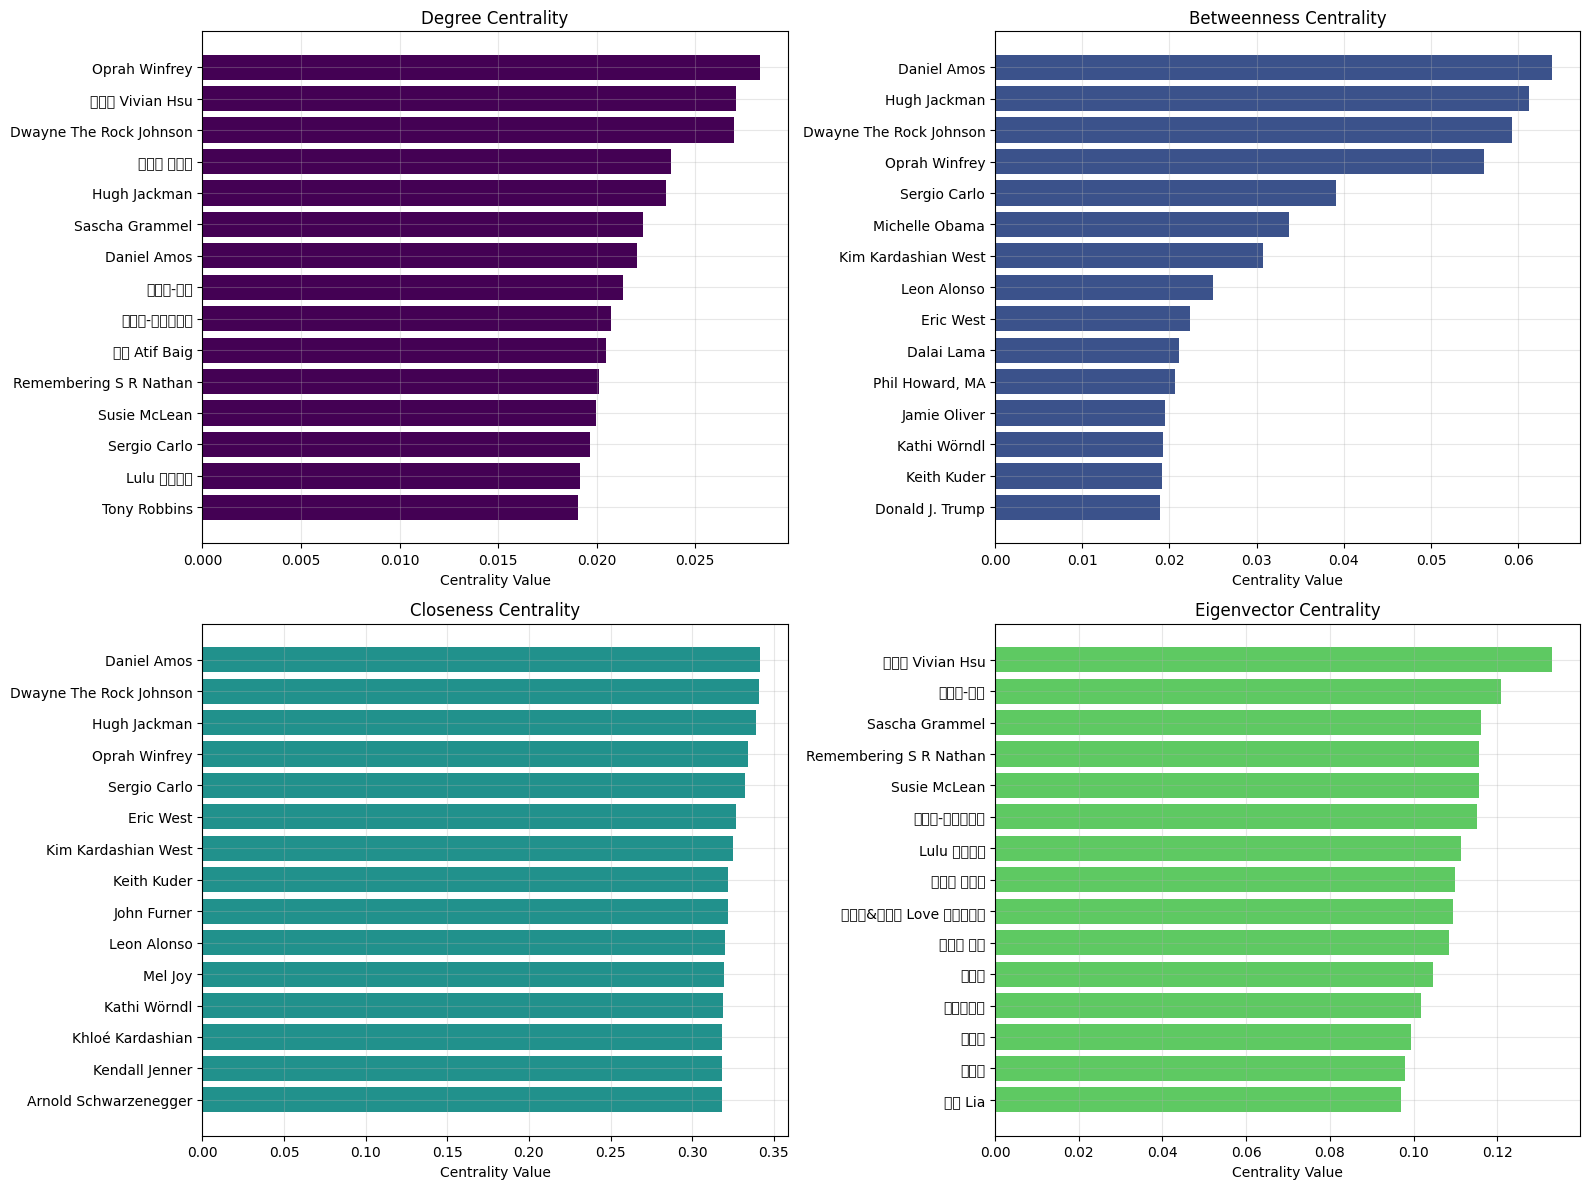

In [ ]:
# Create a comparison plot of different centrality measures for top facebook pages
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

centrality_names = ['degree', 'betweenness', 'closeness', 'eigenvector']
centrality_titles = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']

for i, (name, title) in enumerate(zip(centrality_names, centrality_titles)):
    # Get top 15 Facebook pages for this centrality measure
    sorted_airports = sorted(centralities[name].items(), key=lambda x: x[1], reverse=True)[:15]
    airports = [item[0] for item in sorted_airports]
    values = [item[1] for item in sorted_airports]
    
    # Create horizontal bar plot
    axes[i].barh(range(len(airports)), values, color=plt.cm.viridis(i/4))
    axes[i].set_yticks(range(len(airports)))
    axes[i].set_yticklabels(airports)
    axes[i].set_xlabel('Centrality Value')
    axes[i].set_title(title)
    axes[i].grid(True, alpha=0.3)
    
    # Invert y-axis to show highest values at top
    axes[i].invert_yaxis()

plt.tight_layout()
plt.savefig('centrality_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [73]:
def generate_theoretical_networks(G):
        """Generate ER,WS,BA networks with similar size and density"""
        # take network size of G
        n = G.number_of_nodes()
        m = G.number_of_edges()
        #calculate probability for ER model
        p = (2 * m) / (n * (n - 1)) #define p based on the target number of edges from facebook network
        #ER model
        G_er = nx.erdos_renyi_graph(n, p, seed=42)

        #calculate Watts-Strogatz model
        k = max(4, int(2 * m / n))  # Average degree
        k = k if k % 2 == 0 else k + 1  # Ensure even for WS
        G_ws = nx.watts_strogatz_graph(n, k, p=0.3, seed=42)

        # Barabási-Albert (scale-free)
        m_ba = max(2, int(m / n))  # Edges per new node
        G_ba = nx.barabasi_albert_graph(n, m_ba, seed=42)
        return G_er, G_ws, G_ba
  

In [ ]:
#create theoretical network graphs of similar size and density
G_er, G_ws, G_ba = generate_theoretical_networks(G)



In [ ]:
# Analyze and print basic network properties
print("Facebook Page Network Summary:")
network_summary(G, df_merged)
print("\nErdős-Rényi Model Summary:")
network_summary(G_er, df_merged)
print("\nWatts-Strogatz Model Summary:")
network_summary(G_ws, df_merged)
print("\nBarabási-Albert Model Summary:")
network_summary(G_ba, df_merged)

Facebook Page Network Summary:

NETWORK SUMMARY
Number of nodes: 11534
Number of connections (edges): 66942
Number of routes in dataset: 67099
Number of connected components: 1
Size of largest connected component: 11534
Percentage in largest component: 100.0%
Network density: 0.001006
Average clustering coefficient: 0.1785

Erdős-Rényi Model Summary:

NETWORK SUMMARY
Number of nodes: 11534
Number of connections (edges): 66707
Number of routes in dataset: 67099
Number of connected components: 1
Size of largest connected component: 11534
Percentage in largest component: 100.0%
Network density: 0.001003
Average clustering coefficient: 0.0010

Watts-Strogatz Model Summary:

NETWORK SUMMARY
Number of nodes: 11534
Number of connections (edges): 69204
Number of routes in dataset: 67099
Number of connected components: 1
Size of largest connected component: 11534
Percentage in largest component: 100.0%
Network density: 0.001040
Average clustering coefficient: 0.2389

Barabási-Albert Model Summa

In [110]:
def plot_degree_distribution_all_networks(G,G_er,G_ws,G_ba):
    """
    Plot the degree distribution of the networks (linear + log-log) for all 4 networks in 4x2 grid.
    """
    print("Plotting degree distribution...")
    graphs = {'Facebook': G, 'Erdos-Renyi': G_er, 'Watts-Strogatz': G_ws, 'Barabasi-Albert': G_ba}
    
        # Create figure with subplots
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
    fig.suptitle("Degree Distributions (Linear vs Log-Log)", fontsize=18, fontweight='bold')

    # dictionary to store degrees for statistics
    dict_degrees = {}
    for idx, (name, graph) in enumerate(graphs.items()):
        # Get degree sequence
        degrees = [graph.degree(n) for n in graph.nodes()]
        degree_counts = Counter(degrees)
        degrees_list = list(degree_counts.keys())
        counts_list = list(degree_counts.values())
        # store degrees for statistics
        dict_degrees[name] = degrees
        
        # Linear scale plot
        ax_linear = axes[idx, 0]
        ax_linear.bar(degrees_list, counts_list, alpha=0.7, color='skyblue', edgecolor='black')
        ax_linear.set_xlabel('Degree')
        ax_linear.set_ylabel('Number of Nodes')
        ax_linear.set_title(f'{name} Degree Distribution (Linear Scale)')
        
        # Log-log scale plot
        ax_loglog = axes[idx, 1]
        ax_loglog.loglog(degrees_list, counts_list, 'bo', alpha=0.7, markersize=4)
        ax_loglog.set_xlabel('Degree (log scale)')
        ax_loglog.set_ylabel('Number of Nodes (log scale)')
        ax_loglog.set_title(f'{name} Degree Distribution (Log-Log Scale)')
        ax_loglog.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('degree_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print basic statistics for facebook network
    print(f"\nDegree Distribution Statistics facebook:")
    print(f"Mean degree: {np.mean(dict_degrees['Facebook']):.2f}")
    print(f"Median degree: {np.median(dict_degrees['Facebook']):.2f}")
    print(f"Max degree: {max(dict_degrees['Facebook'])}")
    print(f"Min degree: {min(dict_degrees['Facebook'])}")
    print(f"Standard deviation: {np.std(dict_degrees['Facebook']):.2f}")

    #print basic statistics for ER
    print(f"\nDegree Distribution Statistics ER:")
    print(f"Mean degree: {np.mean(dict_degrees['Erdos-Renyi']):.2f}")
    print(f"Median degree: {np.median(dict_degrees['Erdos-Renyi']):.2f}")
    print(f"Max degree: {max(dict_degrees['Erdos-Renyi'])}")
    print(f"Min degree: {min(dict_degrees['Erdos-Renyi'])}")
    print(f"Standard deviation: {np.std(dict_degrees['Erdos-Renyi']):.2f}")

    #print basic statistics for WS
    print(f"\nDegree Distribution Statistics WS:")
    print(f"Mean degree: {np.mean(dict_degrees['Watts-Strogatz']):.2f}")
    print(f"Median degree: {np.median(dict_degrees['Watts-Strogatz']):.2f}")
    print(f"Max degree: {max(dict_degrees['Watts-Strogatz'])}")
    print(f"Min degree: {min(dict_degrees['Watts-Strogatz'])}")
    print(f"Standard deviation: {np.std(dict_degrees['Watts-Strogatz']):.2f}")

    #print basic statistics for BA
    print(f"\nDegree Distribution Statistics BA:")
    print(f"Mean degree: {np.mean(dict_degrees['Barabasi-Albert']):.2f}")
    print(f"Median degree: {np.median(dict_degrees['Barabasi-Albert']):.2f}")
    print(f"Max degree: {max(dict_degrees['Barabasi-Albert'])}")
    print(f"Min degree: {min(dict_degrees['Barabasi-Albert'])}")
    print(f"Standard deviation: {np.std(dict_degrees['Barabasi-Albert']):.2f}")



Plotting degree distribution...


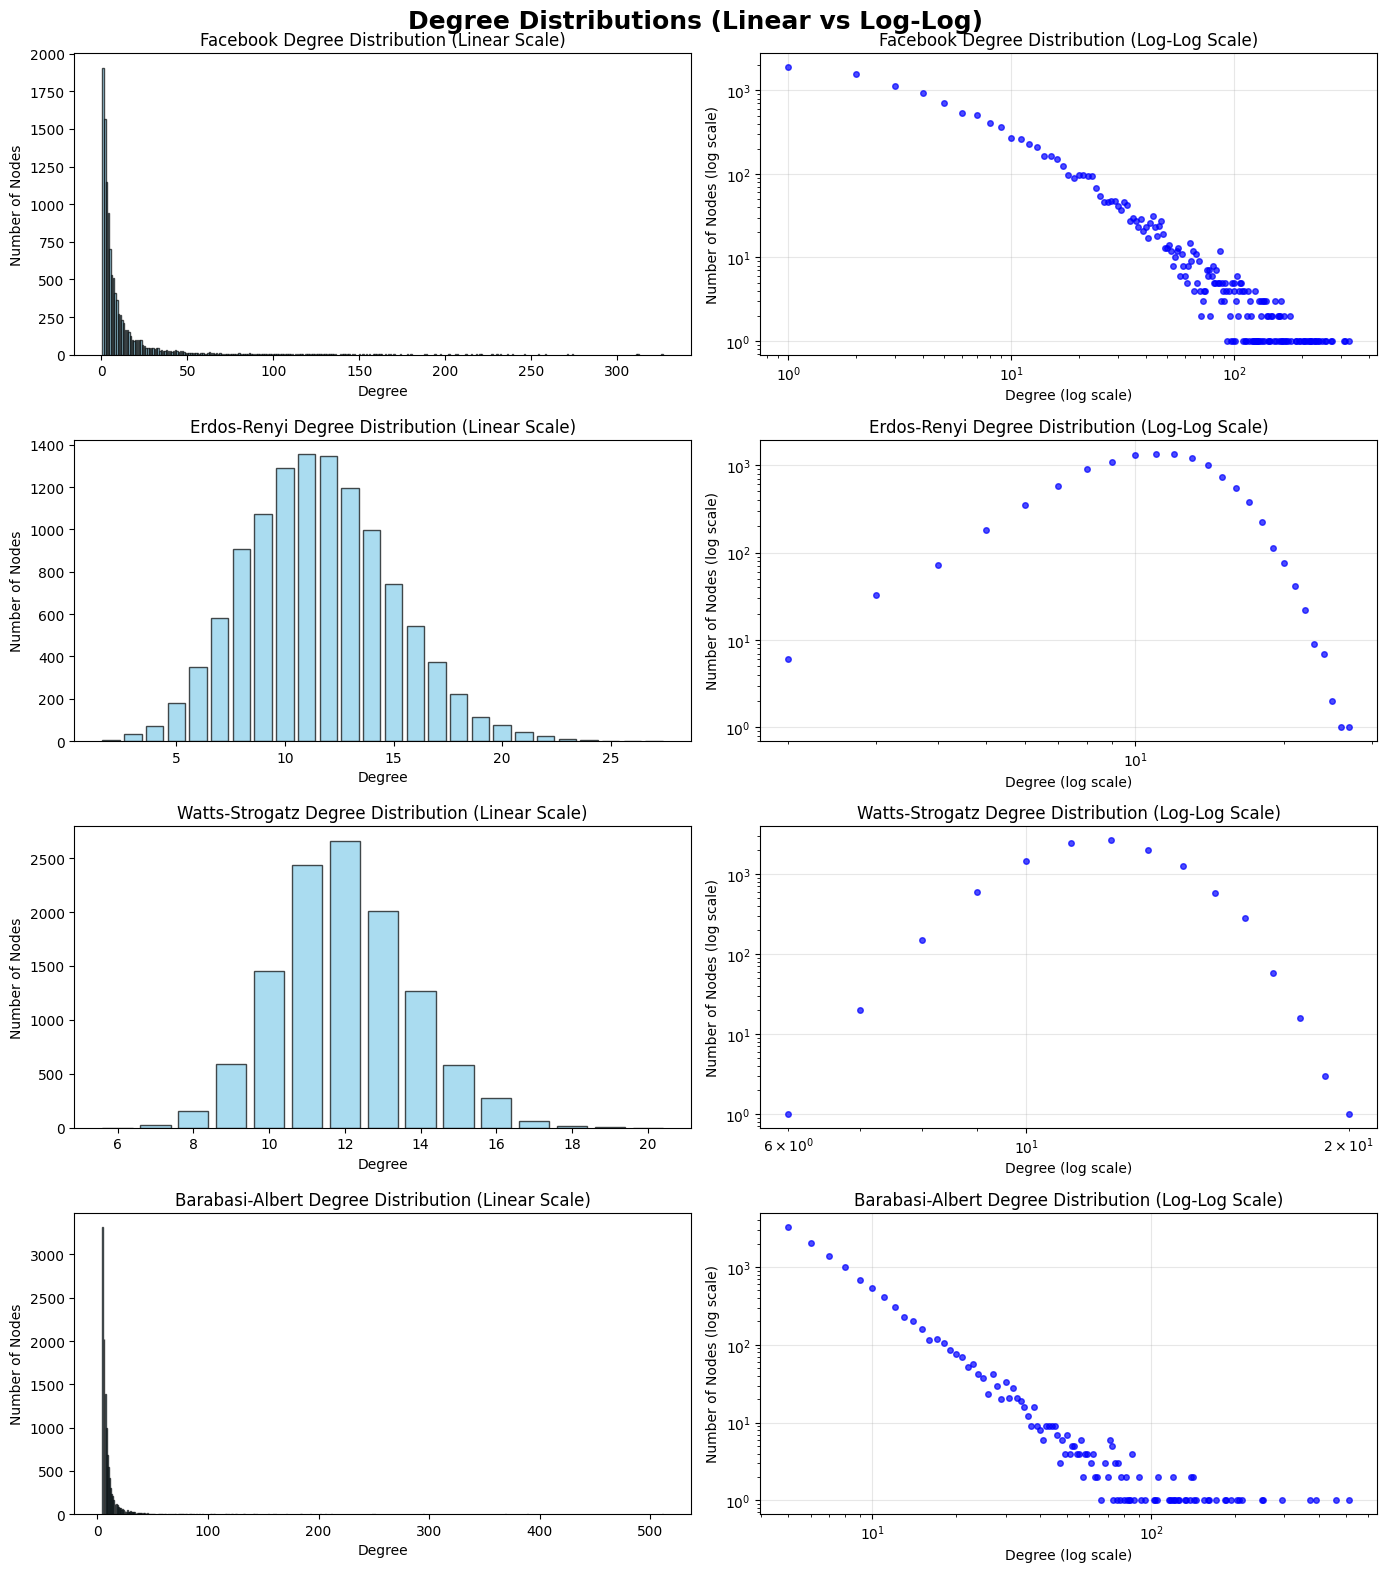


Degree Distribution Statistics facebook:
Mean degree: 11.61
Median degree: 5.00
Max degree: 326
Min degree: 1
Standard deviation: 21.31

Degree Distribution Statistics ER:
Mean degree: 11.57
Median degree: 11.00
Max degree: 27
Min degree: 2
Standard deviation: 3.34

Degree Distribution Statistics WS:
Mean degree: 12.00
Median degree: 12.00
Max degree: 20
Min degree: 6
Standard deviation: 1.76

Degree Distribution Statistics BA:
Mean degree: 10.00
Median degree: 7.00
Max degree: 511
Min degree: 5
Standard deviation: 14.06


In [111]:
plot_degree_distribution_all_networks(G,G_er,G_ws,G_ba)

In [87]:
def analyze_network_properties(G, G_er, G_ws, G_ba):
    """Analyze and compare key network properties."""
    
    print(f"\n" + "="*70)
    print("COMPREHENSIVE NETWORK ANALYSIS")
    print("="*70)
    networks = {
        'Facebook': G,
        'Erdős-Rényi': G_er,
        'Watts-Strogatz': G_ws,
        'Barabási-Albert': G_ba
    }
    
    results = {}
    
    for name, G in networks.items():
        print(f"\nAnalyzing {name} network...")
        
        stats = {}
        # Basic properties
        stats['nodes'] = G.number_of_nodes()
        stats['edges'] = G.number_of_edges()
        stats['density'] = nx.density(G)
        
        # Degree statistics
        degrees = [d for n, d in G.degree()]
        stats['avg_degree'] = np.mean(degrees)
        stats['median_degree'] = np.median(degrees)
        stats['max_degree'] = max(degrees)
        stats['min_degree'] = min(degrees)
        stats['degree_std'] = np.std(degrees)
        stats['degree_variance'] = np.var(degrees)
        
        # Connectivity analysis
        stats['is_connected'] = nx.is_connected(G)
        stats['num_components'] = nx.number_connected_components(G)
        
        # Work with largest component for path analysis
        if stats['is_connected']:
            largest_cc = G
            stats['largest_component_size'] = stats['nodes']
            stats['largest_component_fraction'] = 1.0
        else:
            largest_cc_nodes = max(nx.connected_components(G), key=len)
            largest_cc = G.subgraph(largest_cc_nodes)
            stats['largest_component_size'] = largest_cc.number_of_nodes()
            stats['largest_component_fraction'] = stats['largest_component_size'] / stats['nodes']
        
        # Path lengths (on largest component)
        if largest_cc.number_of_nodes() > 1:
            print(f"  Computing path lengths on component with {largest_cc.number_of_nodes():,} nodes...")
            stats['avg_path_length'] = nx.average_shortest_path_length(largest_cc)
            stats['diameter'] = nx.diameter(largest_cc)
        else:
            stats['avg_path_length'] = 0
            stats['diameter'] = 0
        
        # Clustering analysis
        print(f"  Computing clustering coefficients...")
        stats['avg_clustering'] = nx.average_clustering(G)
        stats['global_clustering'] = nx.transitivity(G)
        
        # Degree distribution analysis
        degree_counts = Counter(degrees)
        stats['degree_distribution'] = degree_counts
        stats['unique_degrees'] = len(degree_counts)
        
        results[name] = stats
    
    return results

In [ ]:
# Analyze and calculate more comprehensive network properties and store in results
results = analyze_network_properties(G, G_er, G_ws, G_ba)



COMPREHENSIVE NETWORK ANALYSIS

Analyzing Facebook network...
  Computing path lengths on component with 11,534 nodes...
  Computing clustering coefficients...

Analyzing Erdős-Rényi network...
  Computing path lengths on component with 11,534 nodes...
  Computing clustering coefficients...

Analyzing Watts-Strogatz network...
  Computing path lengths on component with 11,534 nodes...
  Computing clustering coefficients...

Analyzing Barabási-Albert network...
  Computing path lengths on component with 11,534 nodes...
  Computing clustering coefficients...


{'Facebook': {'nodes': 11534,
  'edges': 66942,
  'density': 0.001006482991163647,
  'avg_degree': np.float64(11.607768337090342),
  'median_degree': np.float64(5.0),
  'max_degree': 326,
  'min_degree': 1,
  'degree_std': np.float64(21.31282834308262),
  'degree_variance': np.float64(454.23665198170596),
  'is_connected': True,
  'num_components': 1,
  'largest_component_size': 11534,
  'largest_component_fraction': 1.0,
  'avg_path_length': 4.6110017813495014,
  'diameter': 15,
  'avg_clustering': 0.17849462850028747,
  'global_clustering': 0.16631648370658153,
  'degree_distribution': Counter({1: 1907,
           2: 1564,
           3: 1145,
           4: 941,
           5: 703,
           6: 531,
           7: 506,
           8: 407,
           9: 362,
           10: 269,
           11: 263,
           12: 229,
           13: 210,
           14: 165,
           15: 162,
           16: 153,
           17: 124,
           21: 97,
           18: 97,
           20: 96,
           22: 9

In [101]:
results

{'Facebook': {'nodes': 11534,
  'edges': 66942,
  'density': 0.001006482991163647,
  'avg_degree': np.float64(11.607768337090342),
  'median_degree': np.float64(5.0),
  'max_degree': 326,
  'min_degree': 1,
  'degree_std': np.float64(21.31282834308262),
  'degree_variance': np.float64(454.23665198170596),
  'is_connected': True,
  'num_components': 1,
  'largest_component_size': 11534,
  'largest_component_fraction': 1.0,
  'avg_path_length': 4.6110017813495014,
  'diameter': 15,
  'avg_clustering': 0.17849462850028747,
  'global_clustering': 0.16631648370658153,
  'degree_distribution': Counter({1: 1907,
           2: 1564,
           3: 1145,
           4: 941,
           5: 703,
           6: 531,
           7: 506,
           8: 407,
           9: 362,
           10: 269,
           11: 263,
           12: 229,
           13: 210,
           14: 165,
           15: 162,
           16: 153,
           17: 124,
           21: 97,
           18: 97,
           20: 96,
           22: 9

In [ ]:
def print_comparison_table(results):
    """Print detailed comparison table."""
    if not results:
        return

    fb_stats = results['Facebook']
    er_stats = results['Erdős-Rényi']
    ws_stats = results['Watts-Strogatz']
    ba_stats = results['Barabási-Albert']

    print(f"\n" + "="*70)
    print("DETAILED COMPARISON TABLE")
    print("="*70)

    print(f"{'Property':<25} {'Facebook':<15} {'Erdős-Rényi':<15} {'Watts-Strogatz':<15} {'Barabási-Albert':<15}")
    print("-" * 70)
    
    # Basic properties
    print(f"{'Nodes':<25} {fb_stats['nodes']:<15,} {er_stats['nodes']:<15,} {ws_stats['nodes']:<15,} {ba_stats['nodes']:<15,}")
    print(f"{'Edges':<25} {fb_stats['edges']:<15,} {er_stats['edges']:<15,} {ws_stats['edges']:<15,} {ba_stats['edges']:<15,}")
    print(f"{'Density':<25} {fb_stats['density']:<15.6f} {er_stats['density']:<15.6f} {ws_stats['density']:<15.6f} {ba_stats['density']:<15.6f}")

    print()
    # Degree statistics
    print(f"{'Average Degree':<25} {fb_stats['avg_degree']:<15.2f} {er_stats['avg_degree']:<15.2f} {ws_stats['avg_degree']:<15.2f} {ba_stats['avg_degree']:<15.2f}")
    print(f"{'Median Degree':<25} {fb_stats['median_degree']:<15.2f} {er_stats['median_degree']:<15.2f} {ws_stats['median_degree']:<15.2f} {ba_stats['median_degree']:<15.2f}")
    print(f"{'Max Degree':<25} {fb_stats['max_degree']:<15} {er_stats['max_degree']:<15} {ws_stats['max_degree']:<15} {ba_stats['max_degree']:<15}")
    print(f"{'Degree Std Dev':<25} {fb_stats['degree_std']:<15.2f} {er_stats['degree_std']:<15.2f} {ws_stats['degree_std']:<15.2f} {ba_stats['degree_std']:<15.2f}")

    print()
    # Connectivity
    print(f"{'Is Connected':<25} {str(fb_stats['is_connected']):<15} {str(er_stats['is_connected']):<15} {str(ws_stats['is_connected']):<15} {str(ba_stats['is_connected']):<15}")
    print(f"{'Num Components':<25} {fb_stats['num_components']:<15} {er_stats['num_components']:<15} {ws_stats['num_components']:<15} {ba_stats['num_components']:<15}")
    print(f"{'Largest Comp %':<25} {fb_stats['largest_component_fraction']*100:<15.1f} {er_stats['largest_component_fraction']*100:<15.1f} {ws_stats['largest_component_fraction']*100:<15.1f} {ba_stats['largest_component_fraction']*100:<15.1f}")

    print()
    # Path lengths
    if fb_stats['avg_path_length'] > 0 and er_stats['avg_path_length'] > 0:
        print(f"{'Avg Path Length':<25} {fb_stats['avg_path_length']:<15.2f} {er_stats['avg_path_length']:<15.2f} {ws_stats['avg_path_length']:<15.2f} {ba_stats['avg_path_length']:<15.2f}")
        print(f"{'Diameter':<25} {fb_stats['diameter']:<15} {er_stats['diameter']:<15} {ws_stats['diameter']:<15} {ba_stats['diameter']:<15}")
    
    print()
    # Clustering
    print(f"{'Avg Clustering':<25} {fb_stats['avg_clustering']:<15.4f} {er_stats['avg_clustering']:<15.4f} {ws_stats['avg_clustering']:<15.4f} {ba_stats['avg_clustering']:<15.4f}")
    print(f"{'Global Clustering':<25} {fb_stats['global_clustering']:<15.4f} {er_stats['global_clustering']:<15.4f} {ws_stats['global_clustering']:<15.4f} {ba_stats['global_clustering']:<15.4f}")
    
    print(f"\n" + "="*70)
    print("KEY INSIGHTS")
    print("="*70)
    
    #ratios fb vs er
    clustering_ratio_fb_er = fb_stats['avg_clustering'] / er_stats['avg_clustering']
    degree_var_ratio_fb_er = fb_stats['degree_variance'] / er_stats['degree_variance']
    path_length_ratio_fb_er = fb_stats['avg_path_length'] / er_stats['avg_path_length']
    #ratios fb vs ws
    clustering_ratio_fb_ws = fb_stats['avg_clustering'] / ws_stats['avg_clustering']
    degree_var_ratio_fb_ws = fb_stats['degree_variance'] / ws_stats['degree_variance']
    path_length_ratio_fb_ws = fb_stats['avg_path_length'] / ws_stats['avg_path_length']
    
    #ratios fb vs ba
    clustering_ratio_fb_ba = fb_stats['avg_clustering'] / ba_stats['avg_clustering']
    degree_var_ratio_fb_ba = fb_stats['degree_variance'] / ba_stats['degree_variance']
    path_length_ratio_fb_ba = fb_stats['avg_path_length'] / ba_stats['avg_path_length']

    # key insights fb vs er
    print(f"• Facebook path length is {path_length_ratio_fb_er:.1f}x higher than ER")
    print(f"• Facebook clustering is {clustering_ratio_fb_er:.1f}x higher than ER")
    print(f"• Facebook degree variance is {degree_var_ratio_fb_er:.1f}x higher than ER")
    print(f"• Facebook has {fb_stats['max_degree']} max degree vs {er_stats['max_degree']} for ER")
    # key insights fb vs ws
    print(f"• Facebook path length is {path_length_ratio_fb_ws:.1f}x higher than WS")
    print(f"• Facebook clustering is {clustering_ratio_fb_ws:.1f}x higher than WS")
    print(f"• Facebook degree variance is {degree_var_ratio_fb_ws:.1f}x higher than WS")
    print(f"• Facebook has {fb_stats['max_degree']} max degree vs {ws_stats['max_degree']} for WS")
    # key insights fb vs ba
    print(f"• Facebook path length is {path_length_ratio_fb_ba:.1f}x higher than BA")
    print(f"• Facebook clustering is {clustering_ratio_fb_ba:.1f}x higher than BA")
    print(f"• Facebook degree variance is {degree_var_ratio_fb_ba:.1f}x higher than BA")
    print(f"• Facebook has {fb_stats['max_degree']} max degree vs {ba_stats['max_degree']} for BA")

    #print(f"• This demonstrates the limitations of random graph models for social networks")

    if not fb_stats['is_connected'] and er_stats['is_connected']:
        print(f"• Facebook is fragmented ({fb_stats['num_components']} components) while ER is connected")
    elif fb_stats['is_connected'] and not er_stats['is_connected']:
        print(f"• Facebook is connected while ER is fragmented ({er_stats['num_components']} components)")
    
    if not fb_stats['is_connected'] and ws_stats['is_connected']:
        print(f"• Facebook is fragmented ({fb_stats['num_components']} components) while WS is connected")
    elif fb_stats['is_connected'] and not ws_stats['is_connected']:
        print(f"• Facebook is connected while WS is fragmented ({ws_stats['num_components']} components)")
    if not fb_stats['is_connected'] and ba_stats['is_connected']:
        print(f"• Facebook is fragmented ({fb_stats['num_components']} components) while BA is connected")
    elif fb_stats['is_connected'] and not ba_stats['is_connected']:
        print(f"• Facebook is connected while BA is fragmented ({ba_stats['num_components']} components)")


In [ ]:
#compare three models with the Facebook page network
print_comparison_table(results)


DETAILED COMPARISON TABLE
Property                  Facebook        Erdős-Rényi     Watts-Strogatz  Barabási-Albert
----------------------------------------------------------------------
Nodes                     11,534          11,534          11,534          11,534         
Edges                     66,942          66,707          69,204          57,645         
Density                   0.001006        0.001003        0.001040        0.000867       

Average Degree            11.61           11.57           12.00           10.00          
Median Degree             5.00            11.00           12.00           7.00           
Max Degree                326             27              20              511            
Degree Std Dev            21.31           3.34            1.76            14.06          

Is Connected              True            True            True            True           
Num Components            1               1               1               1              


In [ ]:
def create_comprehensive_comparison_plot(G, G_er, G_ws, G_ba, results):
    """Create comprehensive comparison visualizations between Facebook and theoretical models (ER, WS, BA)."""

    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    fig.suptitle('Facebook vs Erdős-Rényi: Comprehensive Comparison', 
                fontsize=16, fontweight='bold')

    fb_graph = G
    er_graph = G_er
    ws_graph = G_ws
    ba_graph = G_ba

    # 1. Degree Distribution Comparison
    ax = axes[0, 0]

    fb_degrees = [d for n, d in fb_graph.degree()]
    er_degrees = [d for n, d in er_graph.degree()]
    ws_degrees = [d for n, d in ws_graph.degree()]
    ba_degrees = [d for n, d in ba_graph.degree()]

    ax.hist(fb_degrees, bins=50, alpha=0.7, label='Facebook', color='blue', density=True)
    ax.hist(er_degrees, bins=50, alpha=0.7, label='Erdős-Rényi', color='red', density=True)
    ax.hist(ws_degrees, bins=50, alpha=0.7, label='Watts-Strogatz', color='green', density=True)
    ax.hist(ba_degrees, bins=50, alpha=0.7, label='Barabási-Albert', color='purple', density=True)

    ax.set_xlabel('Degree')
    ax.set_ylabel('Density')
    ax.set_title('Degree Distribution Comparison')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add statistics
    ax.axvline(np.mean(fb_degrees), color='blue', linestyle='--', alpha=0.8)
    ax.axvline(np.mean(er_degrees), color='red', linestyle='--', alpha=0.8)
    ax.axvline(np.mean(ws_degrees), color='green', linestyle='--', alpha=0.8)
    ax.axvline(np.mean(ba_degrees), color='purple', linestyle='--', alpha=0.8)

    # 2. Log-Log Degree Distribution
    ax = axes[0, 1]

    fb_degree_counts = Counter(fb_degrees)
    er_degree_counts = Counter(er_degrees)
    ws_degree_counts = Counter(ws_degrees)
    ba_degree_counts = Counter(ba_degrees)

    fb_degrees_unique = sorted(fb_degree_counts.keys())
    fb_counts = [fb_degree_counts[d] for d in fb_degrees_unique]
    
    er_degrees_unique = sorted(er_degree_counts.keys())
    er_counts = [er_degree_counts[d] for d in er_degrees_unique]
    ws_degrees_unique = sorted(ws_degree_counts.keys())
    ws_counts = [ws_degree_counts[d] for d in ws_degrees_unique]
    ba_degrees_unique = sorted(ba_degree_counts.keys())
    ba_counts = [ba_degree_counts[d] for d in ba_degrees_unique]

    ax.loglog(fb_degrees_unique, fb_counts, 'bo-', alpha=0.7, markersize=3, label='Facebook')
    ax.loglog(er_degrees_unique, er_counts, 'ro-', alpha=0.7, markersize=3, label='Erdős-Rényi')
    ax.loglog(ws_degrees_unique, ws_counts, 'go-', alpha=0.7, markersize=3, label='Watts-Strogatz')
    ax.loglog(ba_degrees_unique, ba_counts, 'mo-', alpha=0.7, markersize=3, label='Barabási-Albert')

    ax.set_xlabel('Degree (log scale)')
    ax.set_ylabel('Frequency (log scale)')
    ax.set_title('Degree Distribution (Log-Log)')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 3. Clustering Coefficient Distribution
    ax = axes[1, 0]

    fb_clustering = list(nx.clustering(fb_graph).values())
    er_clustering = list(nx.clustering(er_graph).values())
    ws_clustering = list(nx.clustering(ws_graph).values())
    ba_clustering = list(nx.clustering(ba_graph).values())

    ax.hist(fb_clustering, bins=30, alpha=0.7, label='Facebook', color='blue', density=True)
    ax.hist(er_clustering, bins=30, alpha=0.7, label='Erdős-Rényi', color='red', density=True)
    ax.hist(ws_clustering, bins=30, alpha=0.7, label='Watts-Strogatz', color='green', density=True)
    ax.hist(ba_clustering, bins=30, alpha=0.7, label='Barabási-Albert', color='purple', density=True)

    ax.set_xlabel('Local Clustering Coefficient')
    ax.set_ylabel('Density')
    ax.set_title('Clustering Coefficient Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 4. Degree vs Clustering
    ax = axes[1, 1]

    # Sample for visualization if needed
    sample_size = min(2000, fb_graph.number_of_nodes())
    fb_nodes_sample = np.random.choice(list(fb_graph.nodes()), sample_size, replace=False)
    er_nodes_sample = np.random.choice(list(er_graph.nodes()), sample_size, replace=False)
    ws_nodes_sample = np.random.choice(list(ws_graph.nodes()), sample_size, replace=False)
    ba_nodes_sample = np.random.choice(list(ba_graph.nodes()), sample_size, replace=False)

    fb_degrees_sample = [fb_graph.degree(n) for n in fb_nodes_sample]
    fb_clustering_sample = [nx.clustering(fb_graph, n) for n in fb_nodes_sample]
    

    er_degrees_sample = [er_graph.degree(n) for n in er_nodes_sample]
    er_clustering_sample = [nx.clustering(er_graph, n) for n in er_nodes_sample]
    ws_degrees_sample = [ws_graph.degree(n) for n in ws_nodes_sample]
    ws_clustering_sample = [nx.clustering(ws_graph, n) for n in ws_nodes_sample]
    ba_degrees_sample = [ba_graph.degree(n) for n in ba_nodes_sample]
    ba_clustering_sample = [nx.clustering(ba_graph, n) for n in ba_nodes_sample]

    ax.scatter(fb_degrees_sample, fb_clustering_sample, alpha=0.5, s=10, 
                color='blue', label='Facebook')
    ax.scatter(er_degrees_sample, er_clustering_sample, alpha=0.5, s=10, 
                color='red', label='Erdős-Rényi')
    ax.scatter(ws_degrees_sample, ws_clustering_sample, alpha=0.5, s=10, 
                color='green', label='Watts-Strogatz')
    ax.scatter(ba_degrees_sample, ba_clustering_sample, alpha=0.5, s=10, 
                color='purple', label='Barabási-Albert')

    ax.set_xlabel('Node Degree')
    ax.set_ylabel('Local Clustering Coefficient')
    ax.set_title('Degree vs Local Clustering')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 5. Network Properties Bar Chart
    ax = axes[2, 0]

    properties = ['Avg Clustering', 'Global Clustering', 'Avg Degree', 'Max Degree/100']
    fb_values = [
        results['Facebook']['avg_clustering'],
        results['Facebook']['global_clustering'],
        results['Facebook']['avg_degree'],
        results['Facebook']['max_degree'] / 100
    ]
    er_values = [
        results['Erdős-Rényi']['avg_clustering'],
        results['Erdős-Rényi']['global_clustering'],
        results['Erdős-Rényi']['avg_degree'],
        results['Erdős-Rényi']['max_degree'] / 100
    ]
    ws_values = [
        results['Watts-Strogatz']['avg_clustering'],
        results['Watts-Strogatz']['global_clustering'],
        results['Watts-Strogatz']['avg_degree'],
        results['Watts-Strogatz']['max_degree'] / 100
    ]
    ba_values = [
        results['Barabási-Albert']['avg_clustering'],
        results['Barabási-Albert']['global_clustering'],
        results['Barabási-Albert']['avg_degree'],
        results['Barabási-Albert']['max_degree'] / 100
    ]

    x = np.arange(len(properties))
    width = 0.35

    ax.bar(x - width/2, fb_values, width, label='Facebook', color='blue', alpha=0.7)
    ax.bar(x + width/2, er_values, width, label='Erdős-Rényi', color='red', alpha=0.7)
    ax.bar(x + 3*width/2, ws_values, width, label='Watts-Strogatz', color='green', alpha=0.7)
    ax.bar(x + 5*width/2, ba_values, width, label='Barabási-Albert', color='purple', alpha=0.7)

    ax.set_xlabel('Network Properties')
    ax.set_ylabel('Value')
    ax.set_title('Network Properties Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(properties, rotation=45)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # 6. Component Size Distribution
    ax = axes[2, 1]

    fb_components = [len(c) for c in nx.connected_components(fb_graph)]
    er_components = [len(c) for c in nx.connected_components(er_graph)]
    ws_components = [len(c) for c in nx.connected_components(ws_graph)]
    ba_components = [len(c) for c in nx.connected_components(ba_graph)]

    fb_components.sort(reverse=True)
    er_components.sort(reverse=True)
    ws_components.sort(reverse=True)
    ba_components.sort(reverse=True)

    # Show top 20 components
    fb_top = fb_components[:20] if len(fb_components) > 20 else fb_components
    er_top = er_components[:20] if len(er_components) > 20 else er_components
    ws_top = ws_components[:20] if len(ws_components) > 20 else ws_components
    ba_top = ba_components[:20] if len(ba_components) > 20 else ba_components

    ax.semilogy(range(1, len(fb_top) + 1), fb_top, 'bo-', label='Facebook', markersize=4)
    ax.semilogy(range(1, len(er_top) + 1), er_top, 'ro-', label='Erdős-Rényi', markersize=4)
    ax.semilogy(range(1, len(ws_top) + 1), ws_top, 'go-', label='Watts-Strogatz', markersize=4)
    ax.semilogy(range(1, len(ba_top) + 1), ba_top, 'mo-', label='Barabási-Albert', markersize=4)

    ax.set_xlabel('Component Rank')
    ax.set_ylabel('Component Size (log scale)')
    ax.set_title('Component Size Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('facebook_vs_erdos_renyi_comparison.png', dpi=300, bbox_inches='tight')
    print("\nComprehensive comparison plot saved as 'facebook_vs_erdos_renyi_comparison.png'")

    return fig


Comprehensive comparison plot saved as 'facebook_vs_erdos_renyi_comparison.png'


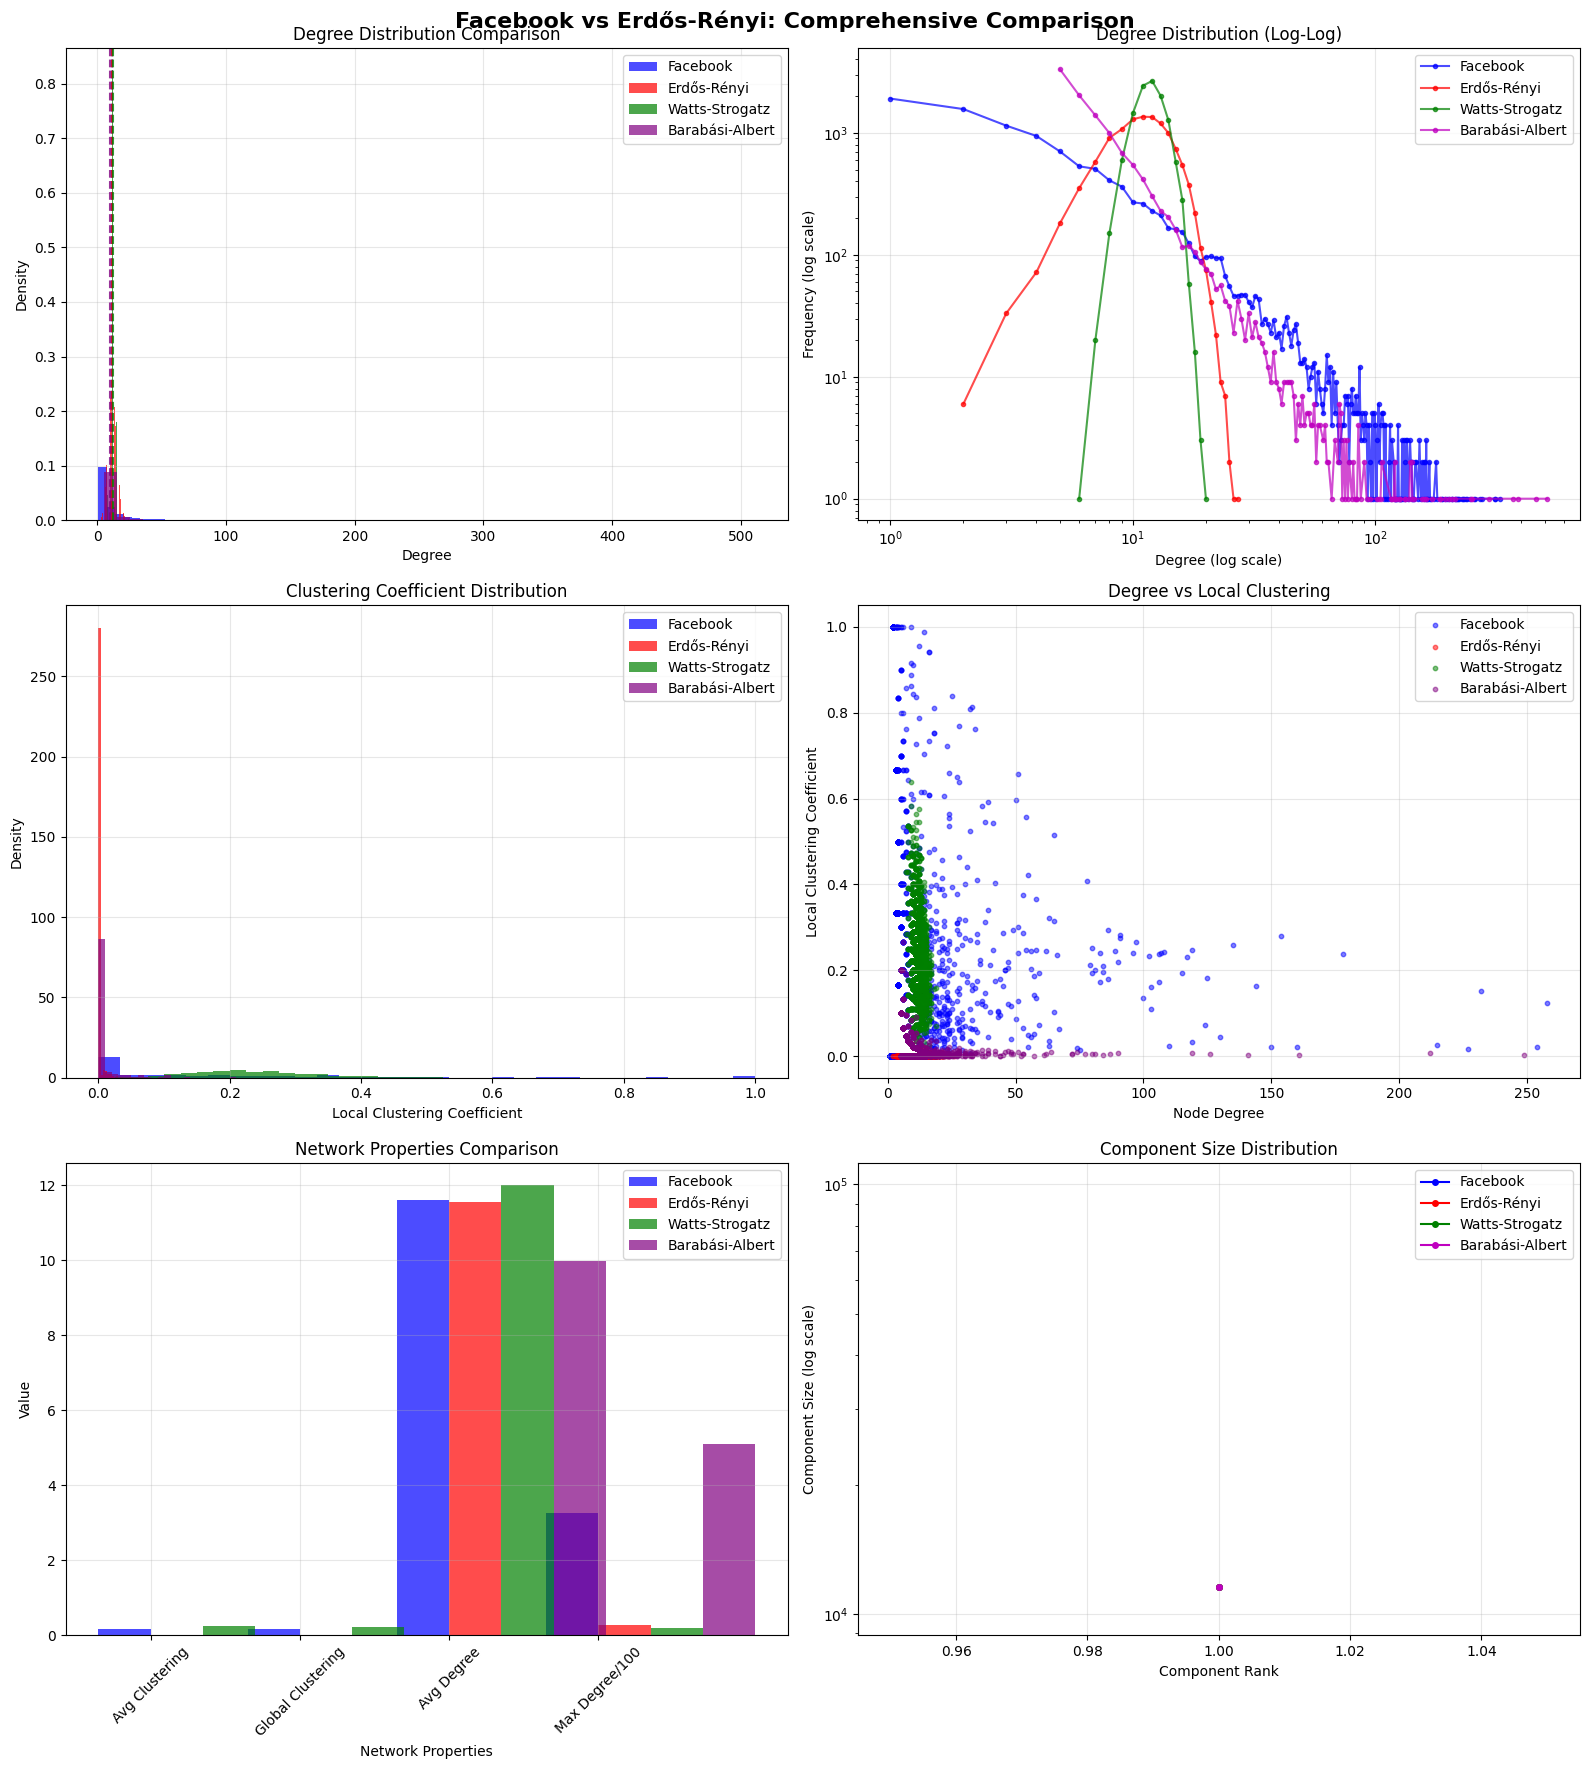

In [ ]:
# Create comprehensive comparison plot between Facebook network and theoretical models
compare_fig = create_comprehensive_comparison_plot(G, G_er, G_ws, G_ba, results)